# Assignment 6: Weather

## Author: Aoife Flavin

Plot:

The temperature
The mean temperature each day
The mean temperature for each month

In [16]:
import pandas as pd
import matplotlib.pyplot as plt



Downlaod the dataset and skip the iniitial rows which don't contain the data

In [7]:
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23)
df.head()

C:\Users\aoife.000\AppData\Local\Temp\ipykernel_5512\3767566514.py:1: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


Clean the data

In [12]:
df.columns = [
    "Date and Time (UTC)", "Indicator 1", "Precipitation Amount (mm)", "Indicator 2",
    "Air Temperature (C)", "Indicator 3", "Wet Bulb Temperature (C)", 
    "Dew Point Temperature (C)", "Vapour Pressure (hPa)", 
    "Relative Humidity (%)", "Mean Sea Level Pressure (hPa)", 
    "Indicator 4", "Mean Wind Speed (knot)", "Indicator 5", 
    "Predominant Wind Direction (degree)", "Synop Code for Present Weather", 
    "Synop Code for Past Weather", "Sunshine Duration (hours)", 
    "Visibility (m)", "Cloud Height (100's of ft)", 
    "Cloud Amount"
]
df.head()

,Date and Time (UTC),Indicator 1,Precipitation Amount (mm),Indicator 2,Air Temperature (C),Indicator 3,Wet Bulb Temperature (C),Dew Point Temperature (C),Vapour Pressure (hPa),Relative Humidity (%),...,Indicator 4,Mean Wind Speed (knot),Indicator 5,Predominant Wind Direction (degree),Synop Code for Present Weather,Synop Code for Past Weather,Sunshine Duration (hours),Visibility (m),Cloud Height (100's of ft),Cloud Amount
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


Make sure that Temperature is all numeric and get rid of any missing values

In [ ]:
df['Air Temperature (C)'] = pd.to_numeric(df['Air Temperature (C)'], errors='coerce')
df_cleaned = df.dropna(subset=['Air Temperature (C)']) 

Convert Date and Time to datetime

In [14]:
df_cleaned['Date and Time (UTC)'] = pd.to_datetime(df_cleaned['Date and Time (UTC)'], format='%d-%b-%Y %H:%M', errors='coerce')

Create the plot

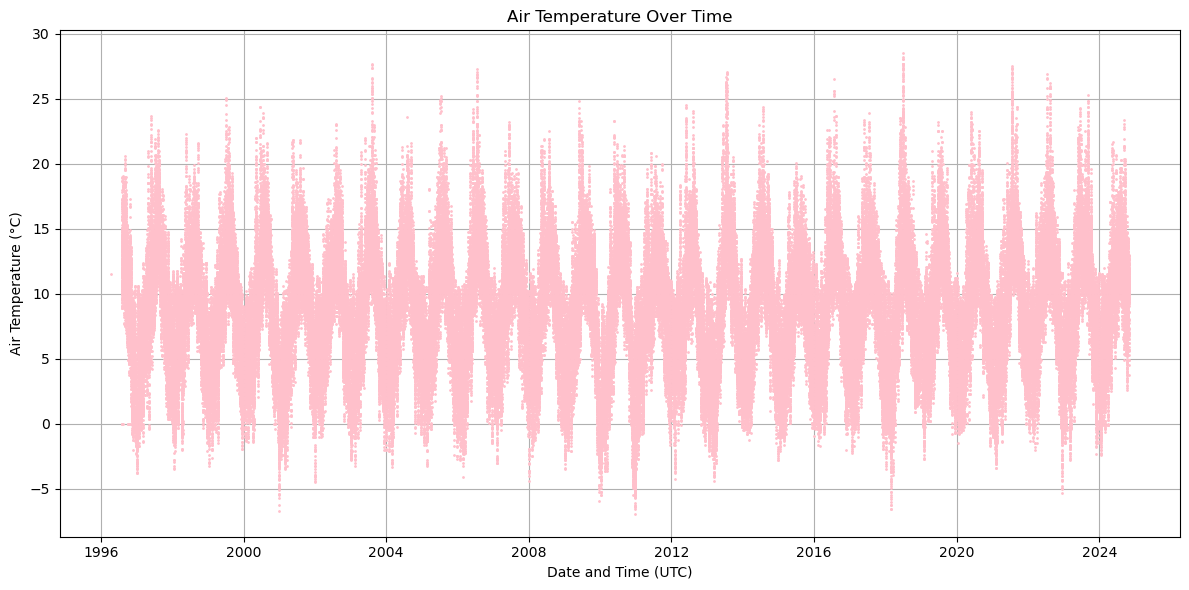

In [21]:
# Plot the Air Temperature over Date and Time
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date and Time (UTC)'], df_cleaned['Air Temperature (C)'], marker='o', linestyle=' ', color='pink', markersize=1)
plt.title('Air Temperature Over Time')
plt.xlabel('Date and Time (UTC)')
plt.ylabel('Air Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

Extract the date and calculate the mean

In [26]:
# Filter data for 2020 to 2024
filtered_data = df_cleaned[(df_cleaned['Date and Time (UTC)'] >= '2020-01-01') & 
                           (df_cleaned['Date and Time (UTC)'] <= '2024-12-31')].copy()

# Extract the date part only
filtered_data['Date'] = filtered_data['Date and Time (UTC)'].dt.date

# Group by date and calculate daily mean temperature
daily_mean_temp = filtered_data.groupby('Date')['Air Temperature (C)'].mean()

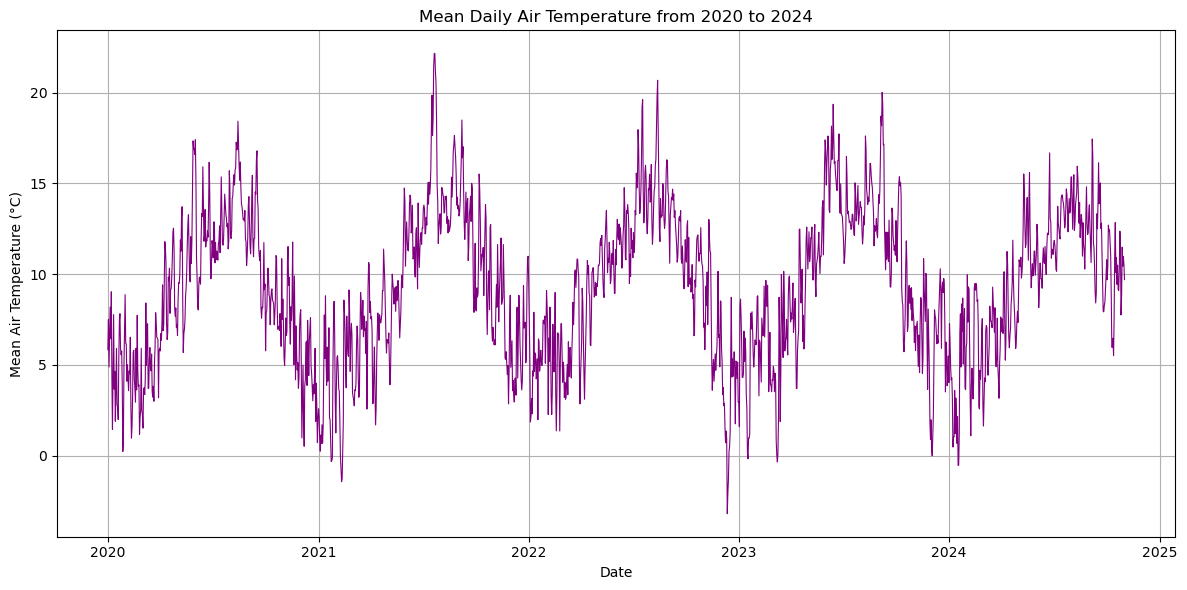

In [28]:
# Plot the daily mean temperature
plt.figure(figsize=(12, 6))
plt.plot(daily_mean_temp.index, daily_mean_temp.values, color='purple', linewidth=0.8)
plt.title('Mean Daily Air Temperature from 2020 to 2024')
plt.xlabel('Date')
plt.ylabel('Mean Air Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()